# GeoProcessing with Python - Chap. 3
## Working with vector Data

by Chris Garrand

IPython Notebooks with some additions and adaptations by Claude COULOMBE - PhD - Montréal

Source: https://github.com/cgarrard/osgeopy-code

Download the code and install it using: sudo -H pip3 install <path-to-ospybook-latest.zip>

Data: https://app.box.com/v/osgeopy

In [11]:
# I use the print function in this code, even though I don't in the book text,
# so that you can run it as a regular script and still get the output. You only
# get output without using print if you're using the interactive window.


# Set this variable to your osgeopy-data directory so that the following
# examples will work without editing. We'll use the os.path.join() function
# to combine this directory and the filenames to make a complete path. Of
# course, you can type the full path to the file for each example if you'd
# prefer.
import os
import sys
# data_dir = r'D:\osgeopy-data'
# data_dir =
data_dir = r'/home/user/Documents/osgeopy-data/osgeopy-data/'

print("Code executed!")

Code executed!


In [12]:
# listing_3.1.py
# Script to read attributes from a shapefile.

# Don't forget to import ogr
import sys
from osgeo import ogr

# Open the data source and get the layer
fn = r'/home/user/Documents/osgeopy-data/osgeopy-data/global/ne_50m_populated_places.shp'
ds = ogr.Open(fn, 0)
if ds is None:
    sys.exit('Could not open {0}.'.format(fn))
lyr = ds.GetLayer(0)

i = 0
for feat in lyr:

    # Get the x,y coordinates
    pt = feat.geometry()
    x = pt.GetX()
    y = pt.GetY()

    # Get the attribute values
    name = feat.GetField('NAME')
    pop = feat.GetField('POP_MAX')
    print(name, pop, x, y)
    i += 1
    if i == 10:
        break
del ds

Bombo 75000 32.533299524864844 0.5832991056146284
Fort Portal 42670 30.27500161597942 0.671004121125236
Potenza 69060 15.798996495640267 40.642002130098206
Campobasso 50762 14.655996558921856 41.56299911864397
Aosta 34062 7.315002595706176 45.7370010670723
Mariehamn 10682 19.949004471869102 60.09699618489543
Ramallah 24599 35.206209378189556 31.90294475142406
Vatican City 832 12.453386544971766 41.903282179960115
Poitier 85960 0.3332765285345545 46.58329225573658
Clermont-Ferrand 233050 3.080008095928406 45.779982115759424


### Listing_3.2.py

    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]]

In [13]:
# listing_3.3.py
# Script to extract certain features from a shapefile and save them to
# another file.

import sys
from osgeo import ogr

# Open the folder dataa source for writing
ds = ogr.Open(r'/home/user/Documents/osgeopy-data/osgeopy-data/global', 1)
if ds is None:
    sys.exit('Could not open folder.')

# Get the input shapefile
in_lyr = ds.GetLayer('ne_50m_populated_places')

# Create a point layer
if ds.GetLayer('capital_cities'):
    ds.DeleteLayer('capital_cities')
out_lyr = ds.CreateLayer('capital_cities',
                         in_lyr.GetSpatialRef(),
                         ogr.wkbPoint)
out_lyr.CreateFields(in_lyr.schema)

# Create a blank feature
out_defn = out_lyr.GetLayerDefn()
out_feat = ogr.Feature(out_defn)

for in_feat in in_lyr:
    if in_feat.GetField('FEATURECLA') == 'Admin-0 capital':

        # Copy geometry and attributes
        geom = in_feat.geometry()
        out_feat.SetGeometry(geom)
        for i in range(in_feat.GetFieldCount()):
            value = in_feat.GetField(i)
            out_feat.SetField(i, value)

        # Insert the feature
        out_lyr.CreateFeature(out_feat)

# Close files
del ds
# Script to extract certain features from a shapefile and save them to
# another file.

import sys
from osgeo import ogr

# Open the folder dataa source for writing
ds = ogr.Open(r'/home/user/Documents/osgeopy-data/osgeopy-data/global',1)
if ds is None:
    sys.exit('Could not open folder.')

# Get the input shapefile
in_lyr = ds.GetLayer('ne_50m_populated_places')

# Create a point layer
if ds.GetLayer('capital_cities'):
    ds.DeleteLayer('capital_cities')
out_lyr = ds.CreateLayer('capital_cities',
                         in_lyr.GetSpatialRef(),
                         ogr.wkbPoint)
out_lyr.CreateFields(in_lyr.schema)

# Create a blank feature
out_defn = out_lyr.GetLayerDefn()
out_feat = ogr.Feature(out_defn)

for in_feat in in_lyr:
    if in_feat.GetField('FEATURECLA') == 'Admin-0 capital':

        # Copy geometry and attributes
        geom = in_feat.geometry()
        out_feat.SetGeometry(geom)
        for i in range(in_feat.GetFieldCount()):
            value = in_feat.GetField(i)
            out_feat.SetField(i, value)

        # Insert the feature
        out_lyr.CreateFeature(out_feat)

# Close files
del ds

print("Code executed!")

Code executed!


In [14]:
##########################  3.2 Introduction to OGR  ##########################

# Import the module.
from osgeo import ogr

# Get the GeoJSON driver.
driver = ogr.GetDriverByName('GeoJSON')
print(driver)

# It's not case sensitive, so this also works.
driver = ogr.GetDriverByName('geojson')
print(driver)

# This does not work because the real name is 'Esri shapefile'.
driver = ogr.GetDriverByName('shapefile')
print(driver)

# Print out a list of drivers.
import ospybook as pb
pb.print_drivers()


<osgeo.ogr.Driver; proxy of <Swig Object of type 'OGRDriverShadow *' at 0x7efd53d10540> >
<osgeo.ogr.Driver; proxy of <Swig Object of type 'OGRDriverShadow *' at 0x7efd53d10570> >
None
PCIDSK (read/write)
netCDF (read/write)
JP2OpenJPEG (readonly)
PDF (read/write)
ESRI Shapefile (read/write)
MapInfo File (read/write)
UK .NTF (readonly)
OGR_SDTS (readonly)
S57 (read/write)
DGN (read/write)
OGR_VRT (readonly)
REC (readonly)
Memory (read/write)
BNA (read/write)
CSV (read/write)
NAS (readonly)
GML (read/write)
GPX (read/write)
LIBKML (read/write)
KML (read/write)
GeoJSON (read/write)
Interlis 1 (read/write)
Interlis 2 (read/write)
OGR_GMT (read/write)
GPKG (read/write)
SQLite (read/write)
OGR_DODS (readonly)
ODBC (read/write)
WAsP (read/write)
PGeo (readonly)
MSSQLSpatial (read/write)
OGR_OGDI (readonly)
PostgreSQL (read/write)
MySQL (read/write)
OpenFileGDB (readonly)
XPlane (readonly)
DXF (read/write)
CAD (readonly)
Geoconcept (read/write)
GeoRSS (read/write)
GPSTrackMaker (read/write)
V

In [15]:
###########################  3.3 Reading vector data  #########################

####################  3.3.1 Accessing specific features  ######################

# Open the data source for the examples.
fn = os.path.join(data_dir, 'global', 'ne_50m_populated_places.shp')
ds = ogr.Open(fn, 0)
if ds is None:
    sys.exit('Could not open {0}.'.format(fn))
lyr = ds.GetLayer(0)

# Get the total number of features and the last one.
num_features = lyr.GetFeatureCount()
last_feature = lyr.GetFeature(num_features - 1)
print(last_feature.NAME)

# Test what happens if you try to loop through a layer twice. The second
# loop should not print anything. (This is actually why in later examples we
# reopen the data source and get the layer for each little code snippet.
# If you ran them all at once without doing that, they wouldn't work.)
fn = os.path.join(data_dir, 'Washington', 'large_cities.geojson')
ds = ogr.Open(fn, 0)
lyr = ds.GetLayer(0)
print('First loop')
for feat in lyr:
    print(feat.GetField('Name'), feat.GetField('Population'))
print('Second loop')
for feat in lyr:
    pt = feat.geometry()
    print(feat.GetField('Name'), pt.GetX(), pt.GetY())

# # But it will if you reset reading first.
ds = ogr.Open(fn, 0)
lyr = ds.GetLayer(0)
print('First loop')
for feat in lyr:
    print(feat.GetField('Name'), feat.GetField('Population'))
print('Second loop')
lyr.ResetReading() # This is the important line.
for feat in lyr:
    pt = feat.geometry()
    print(feat.GetField('Name'), pt.GetX(), pt.GetY())


Hong Kong
First loop
Bellingham 67171
Everett 91488
Shoreline 53025
Seattle 563374
Bellevue 109569
Renton 50052
Kent 79524
Federal Way 83259
Tacoma 193556
Spokane 195629
Yakima 71845
Vancouver 143560
Kennewick 54693
Second loop
First loop
Bellingham 67171
Everett 91488
Shoreline 53025
Seattle 563374
Bellevue 109569
Renton 50052
Kent 79524
Federal Way 83259
Tacoma 193556
Spokane 195629
Yakima 71845
Vancouver 143560
Kennewick 54693
Second loop
Bellingham -122.48822021484375 48.759552001953125
Everett -122.20207214355469 47.97898864746094
Shoreline -122.34152221679688 47.75564956665039
Seattle -122.33206939697266 47.6062126159668
Bellevue -122.20067596435547 47.610382080078125
Renton -122.2170639038086 47.482879638671875
Kent -122.2348403930664 47.38093185424805
Federal Way -122.31262969970703 47.32231903076172
Tacoma -122.44429779052734 47.25288009643555
Spokane -117.4260482788086 47.658782958984375
Yakima -120.50589752197266 46.60206604003906
Vancouver -122.66148376464844 45.63872909545

FID    Geometry                  NAME           POP_MAX    
0      POINT (32.533, 0.583)     Bombo          75000      
1      POINT (30.275, 0.671)     Fort Portal    42670      
2      POINT (15.799, 40.642)    Potenza        69060      
3 of 1249 features


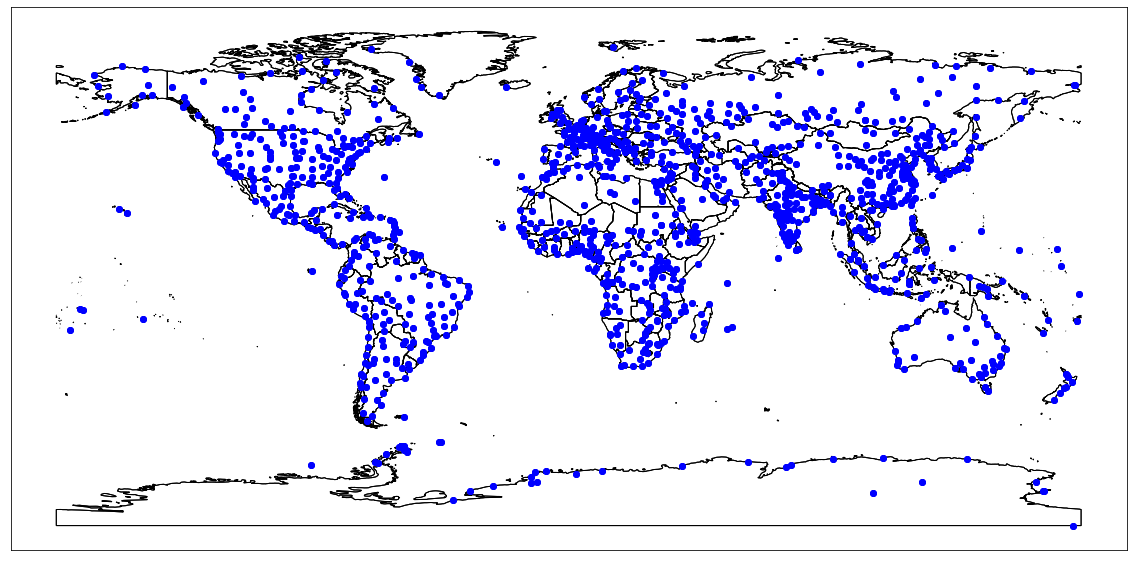

In [16]:
#########################  3.3.2 Viewing your data  ###########################

# Print name and population attributes.
import ospybook as pb
fn = os.path.join(data_dir, 'global', 'ne_50m_populated_places.shp')
pb.print_attributes(fn, 3, ['NAME', 'POP_MAX'])

# Turn off geometries but skip field list parameters that come before the
# "geom" one.
# pb.print_attributes(fn, 3, geom=False)

# If you want to see what happens without the "geom" keyword in the last
# example, try this:
# pb.print_attributes(fn, 3, False)

# Import VectorPlotter and change directories
from ospybook.vectorplotter import VectorPlotter
os.chdir(os.path.join(data_dir, 'global'))

# Plot populated places on top of countries from an interactive session.
# C.Coulombe - I've changed the figure size
vp = VectorPlotter(True,figsize=(20,10))
vp.plot('ne_50m_admin_0_countries.shp', fill=False)
vp.plot('ne_50m_populated_places.shp', 'bo')

# Plot populated places on top of countries non-interactively. Delete the vp
# variable if you tried the interactive one first.
del vp
vp = VectorPlotter(False)
vp.plot('ne_50m_admin_0_countries.shp', fill=False)
vp.plot('ne_50m_populated_places.shp', 'bo')
vp.draw()
vp.show("")


In [21]:
#########################  3.4 Getting metadata  ##############################

# Open the large_cities data source.
fn = os.path.join(data_dir, 'Washington', 'large_cities.geojson')
ds = ogr.Open(fn)
if ds is None:
    sys.exit('Could not open {0}.'.format(fn))

# Get the spatial extent.
lyr = ds.GetLayer(0)
extent = lyr.GetExtent()
print(extent)
print('Upper left corner: {}, {}'.format(extent[0], extent[3]))
print('Lower right corner: {}, {}'.format(extent[1], extent[2]))

# Get geometry type
print(lyr.GetGeomType())
print(lyr.GetGeomType() == ogr.wkbPoint)
print(lyr.GetGeomType() == ogr.wkbPolygon)

# Get geometry type as human-readable string.
feat = lyr.GetFeature(0)
print(feat.geometry().GetGeometryName())

# Get spatial reference system. The output is also in listing3_2.py.
print(lyr.GetSpatialRef())

# Get field names and types
for field in lyr.schema:
    print(field.name, field.GetTypeName())


(-122.66148376464844, -117.4260482788086, 45.638729095458984, 48.759552001953125)
Upper left corner: -122.66148376464844, 48.759552001953125
Lower right corner: -117.4260482788086, 45.638729095458984
1
True
False
POINT
GEOGCS["NAD83",
    DATUM["North_American_Datum_1983",
        SPHEROID["GRS 1980",6378137,298.257222101,
            AUTHORITY["EPSG","7019"]],
        TOWGS84[0,0,0,0,0,0,0],
        AUTHORITY["EPSG","6269"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4269"]]
CITIESX020 Integer
FEATURE String
NAME String
POP_RANGE String
POPULATION Integer
FIPS55 String
COUNTY String
FIPS String
STATE String
STATE_FIPS String
DISPLAY Integer


### *** Attention! *** You should create an `ouput` folder in the `osgeopy-data` folder

ESRI Shapefile
GeoJSON


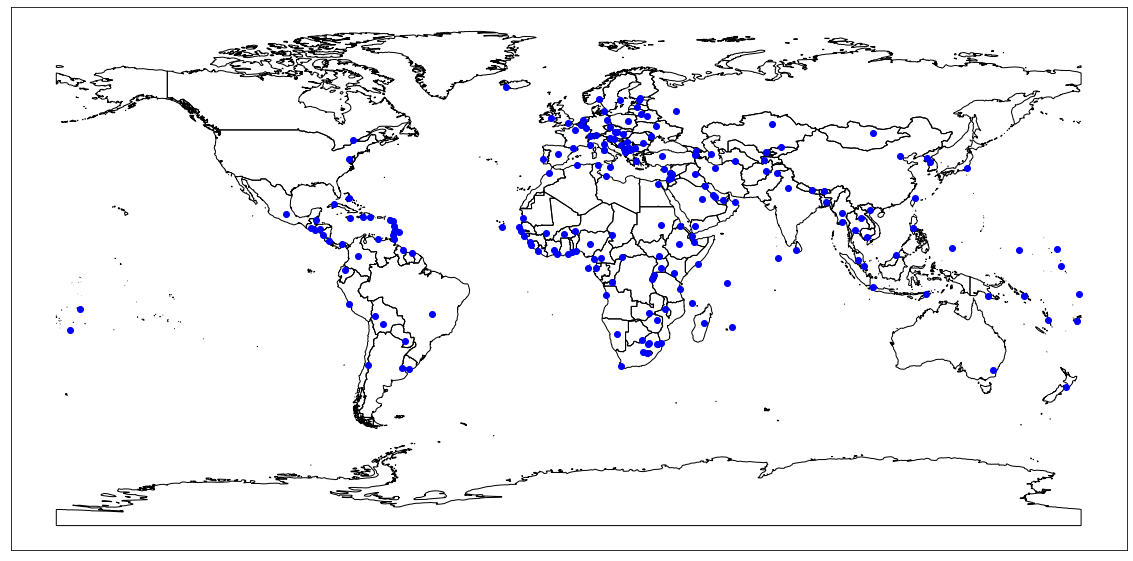

In [22]:
########################  3.5 Writing vector data  ############################

# Check the results from listing 3.2.
os.chdir(os.path.join(data_dir, 'global'))
# C.Coulombe - I've changed the figure size
vp = VectorPlotter(True,figsize=(20,10))
vp.plot('ne_50m_admin_0_countries.shp', fill=False)
vp.plot('capital_cities.shp', 'bo')

######################  3.5.1 Creating new data sources  ######################

# Get the same driver as an existing data source
ds = ogr.Open(os.path.join(data_dir, 'global', 'ne_50m_admin_0_countries.shp'))
driver = ds.GetDriver()
print(driver.name)

# Get a driver by name
json_driver = ogr.GetDriverByName('GeoJSON')
print(json_driver.name)

# Create a GeoJSON file
# WARNING *** You should create an output folder ***
json_fn = os.path.join(data_dir, 'output', 'example.geojson')
json_ds = json_driver.CreateDataSource(json_fn)
if json_ds is None:
#   sys.exit('Could not create {0}.'.format(json_fn))
    print('Could not create {0}.'.format(json_fn))
    
# Create a SpatiaLite database. This will fail if your version of OGR wasn't
# built with SpatiaLite suppoert.
driver = ogr.GetDriverByName('SQLite')
ds = driver.CreateDataSource(os.path.join(data_dir, 'output', 'earth.sqlite'),
                             ['SPATIALITE=yes'])

# Delete a data source if it exists instead of trying to overwrite it.
if os.path.exists(json_fn):
    json_driver.DeleteDataSource(json_fn)
json_ds = json_driver.CreateDataSource(json_fn)
if json_ds is None:
#    sys.exit('Could not create {0}.'.format(json_fn))
    print('Could not create {0}.'.format(json_fn))


In [19]:
############################  Using OGR exceptions  ###########################

# Try running this when output/africa.geojson already exists in order to raise
# the error.

# Turn on OGR exceptions. Try commenting this out to see how the behavior
# changes.
ogr.UseExceptions()

fn = os.path.join(data_dir, 'output', 'africa.geojson')
driver = ogr.GetDriverByName('GeoJSON')
print('Doing some preliminary analysis...')

try:
    # This will fail if the file already exists
    ds = driver.CreateDataSource(fn)
    lyr = ds.CreateLayer('layer')
    # Do more stuff, like fields and save data
except RuntimeError as e:
    # This runs if the data source already exists and an error was raised
    print(e)

print('Doing some more analysis...')


Doing some preliminary analysis...
Doing some more analysis...


#### The above example seems not working...

In [23]:
#########################  3.5.2 Creating new fields  #########################
# Create a shapefile that changes the precision for an attribute field. Also
# notice how the name field is not kept at 6 characters. If it were, many of
# the names would be truncated, but you shouldn't see that if you look at the
# attributes for the file created here. For the example, we'll create x and y
# fields for the Washington large_cities dataset.

# Much of this code is not in the book text.

# Open the input shapefile.
in_fn = os.path.join(data_dir, 'Washington', 'large_cities.shp')
in_ds = ogr.Open(in_fn, 0)
if in_ds is None:
    sys.exit('Could not open {0}.'.format(in_fn))
in_lyr = in_ds.GetLayer(0)

# Create the output shapefile.
driver = in_ds.GetDriver()
out_fn = os.path.join(data_dir, 'output', 'precision_test.shp')
if os.path.exists(out_fn):
    driver.DeleteDataSource(out_fn)
out_ds = driver.CreateDataSource(out_fn)
if out_ds is None:
    sys.exit('Could not create {0}.'.format(out_fn))

# Create the shapefile layer.
out_lyr = out_ds.CreateLayer('precision_test',
                             in_lyr.GetSpatialRef(),
                             ogr.wkbPoint)

# Set the name field to have a width of 6, but it will be expanded.
name_fld = ogr.FieldDefn('Name', ogr.OFTString)
name_fld.SetWidth(6)
out_lyr.CreateField(name_fld)

# Create two attribute fields using default precision.
coord_fld = ogr.FieldDefn('X_default', ogr.OFTReal)
out_lyr.CreateField(coord_fld)
coord_fld.SetName('Y_default')
out_lyr.CreateField(coord_fld)

# Create two attribute fields using a smaller precision. THIS IS THE
# EXAMPLE IN THE BOOK.
coord_fld = ogr.FieldDefn('X_short', ogr.OFTReal)
coord_fld.SetWidth(8)
coord_fld.SetPrecision(3)
out_lyr.CreateField(coord_fld)
coord_fld.SetName('Y_short')
out_lyr.CreateField(coord_fld)

# Copy data. After doing this, look at the attributes for your new shapefile
# and see the difference between the default and short fields.
out_feat = ogr.Feature(out_lyr.GetLayerDefn())
for in_feat in in_lyr:
    pt = in_feat.geometry()
    name = in_feat.GetField('NAME')
    out_feat.SetGeometry(in_feat.geometry())
    out_feat.SetField('Name', name)
    out_feat.SetField('X_default', pt.GetX())
    out_feat.SetField('Y_default', pt.GetY())
    out_feat.SetField('X_short', pt.GetX())
    out_feat.SetField('Y_short', pt.GetY())
    out_lyr.CreateFeature(out_feat)

print("Code executed!")

Code executed!


In [24]:
########################  3.6 Updating existing data  #########################

# Set things up for the following examples.
original_fn = os.path.join(data_dir, 'Washington', 'large_cities.shp')
new_fn = os.path.join(data_dir, 'output', 'large_cities2.shp')

# First make a copy of a shapefile so you have something to test things on.
pb.copy_datasource(original_fn, new_fn)

# Open the copied shapefile for writing.
ds = ogr.Open(new_fn, 1)
if ds is None:
    sys.exit('Could not open {0}.'.format(new_fn))
lyr = ds.GetLayer(0)

# Take a look at the attributes before you change anything.
print('Original attributes')
pb.print_attributes(lyr, geom=False)


Original attributes
FID    CITIESX020    FEATURE            NAME           POP_RANGE            POP_2000    FIPS55    COUNTY              FIPS     STATE    STATE_FIPS    DISPLAY    
0      404           County Seat        Bellingham     50,000 - 99,999      67171       05280     Whatcom County      53073    WA       53            0          
1      538           County Seat        Everett        50,000 - 99,999      91488       22640     Snohomish County    53061    WA       53            0          
2      613           Populated Place    Shoreline      50,000 - 99,999      53025       63960     King County         53033    WA       53            0          
3      685           County Seat        Seattle        500,000 - 999,999    563374      63000     King County         53033    WA       53            0          
4      697           Populated Place    Bellevue       100,000 - 249,999    109569      05210     King County         53033    WA       53            0          
5      7

In [25]:
####################  3.6.1 Changing the layer definition  ####################

# Change the name of the "Name" attribute field by creating a new field
# definition and using it to alter the existing field.

# C.Coulombe - I've changed the attribute in order to work properly
i = lyr.GetLayerDefn().GetFieldIndex('NAME')
fld_defn = ogr.FieldDefn('CITY_NAME', ogr.OFTString)
lyr.AlterFieldDefn(i, fld_defn, ogr.ALTER_NAME_FLAG)

# Change the name of the POINT_X field to X_coord and the precision to 4
# decimal places. Need to make sure that the width is big enough or things

# C.Coulombe - I've changed the attribute in order to work properly
lyr_defn = lyr.GetLayerDefn()
i = lyr_defn.GetFieldIndex('STATE_FIPS')
width = lyr_defn.GetFieldDefn(i).GetWidth()

fld_defn = ogr.FieldDefn('STATE_CODE', ogr.OFTReal)
fld_defn.SetWidth(width)
fld_defn.SetPrecision(4)
flag = ogr.ALTER_NAME_FLAG + ogr.ALTER_WIDTH_PRECISION_FLAG
lyr.AlterFieldDefn(i, fld_defn, flag)

'''
# C. Coulombe - Alternative manner should be done separately...

# A slightly different method to change the name of the POINT_X field to
# X_coord and the precision to 4 decimal places. Copy the original field
# definition and use it. This uses the built-in Python copy module. If you
# do not copy the FieldDefn and instead try to use the original, you will
# probably get weird results.
import copy
lyr_defn = lyr.GetLayerDefn()
i = lyr_defn.GetFieldIndex('STATE_FIPS')
fld_defn = copy.copy(lyr_defn.GetFieldDefn(i))
fld_defn.SetName('STATE_CODE')
fld_defn.SetPrecision(4)
flag = ogr.ALTER_NAME_FLAG + ogr.ALTER_WIDTH_PRECISION_FLAG
lyr.AlterFieldDefn(i, fld_defn, flag)

'''

# Take a look at the attributes now. The precision won't be affected yet,
# but the field names should be changed and there should be a blank ID
# field.
print('\nNew field names and empty ID field')
pb.print_attributes(lyr, geom=False)



New field names and empty ID field
FID    CITIESX020    FEATURE            CITY_NAME      POP_RANGE            POP_2000    FIPS55    COUNTY              FIPS     STATE    STATE_CODE    DISPLAY    
0      404           County Seat        Bellingham     50,000 - 99,999      67171       05280     Whatcom County      53073    WA       53            0          
1      538           County Seat        Everett        50,000 - 99,999      91488       22640     Snohomish County    53061    WA       53            0          
2      613           Populated Place    Shoreline      50,000 - 99,999      53025       63960     King County         53033    WA       53            0          
3      685           County Seat        Seattle        500,000 - 999,999    563374      63000     King County         53033    WA       53            0          
4      697           Populated Place    Bellevue       100,000 - 249,999    109569      05210     King County         53033    WA       53            0   

In [14]:
###############  3.6.2 Adding, updating, and deleting features  ###############

# Add a unique ID to each feature.
lyr.ResetReading()
lyr.CreateField(ogr.FieldDefn('ID', ogr.OFTInteger))
n = 1
for feat in lyr:
    feat.SetField('ID', n)
    lyr.SetFeature(feat)
    n += 1
print('\nID has been added and precision has taken effect')
pb.print_attributes(lyr, geom=False)

# Delete Seattle. Notice that although it doesn't print the record for Seattle,
# it still thinks there are 14 features.
lyr.ResetReading()
for feat in lyr:
    # C. Coulombe - I've changed the attribute in order the code to work
    if feat.GetField('CITY_NAME') == 'Seattle':
        lyr.DeleteFeature(feat.GetFID())
print('\nSeattle deleted')
pb.print_attributes(lyr, geom=False)

# Pack the database in order to get rid of that ghost feature, and recompute
# the spatial extent.
ds.ExecuteSQL('REPACK ' + lyr.GetName())
ds.ExecuteSQL('RECOMPUTE EXTENT ON ' + lyr.GetName())
print('\nDatabase packed')
pb.print_attributes(lyr, geom=False)



ID has been added and precision has taken effect
FID    CITIESX020    FEATURE            CITY_NAME      POP_RANGE            POP_2000    FIPS55    COUNTY              FIPS     STATE    STATE_CODE    DISPLAY    ID    
0      404           County Seat        Bellingham     50,000 - 99,999      67171       05280     Whatcom County      53073    WA       53            0          1     
1      538           County Seat        Everett        50,000 - 99,999      91488       22640     Snohomish County    53061    WA       53            0          2     
2      613           Populated Place    Shoreline      50,000 - 99,999      53025       63960     King County         53033    WA       53            0          3     
3      685           County Seat        Seattle        500,000 - 999,999    563374      63000     King County         53033    WA       53            0          4     
4      697           Populated Place    Bellevue       100,000 - 249,999    109569      05210     King County 

In [27]:
##################  Bonus examples for creating new layers  ###################

# Just set stuff up for the examples. Note that these examples do not copy any
# attribute data into the json files.
shp_fn = os.path.join(data_dir, 'global', 'ne_50m_admin_0_countries.shp')
shp_ds = ogr.Open(shp_fn, 0)
if shp_ds is None:
    sys.exit('Could not open {0}'.format(shp_fn))
shp_lyr = shp_ds.GetLayer(0)
json_driver = ogr.GetDriverByName('GeoJSON')

print('Code executed!')

Code executed!


In [28]:
#########################  Example 1: Default precision
# Create a json file using the default precision. Use a text editor to comapare
# the file created here with the files created in the next two examples.

# Create the data source.
json_fn = os.path.join(data_dir, 'output', 'africa-default.geojson')
if os.path.exists(json_fn):
    json_driver.DeleteDataSource(json_fn)
json_ds = json_driver.CreateDataSource(json_fn)
if json_ds is None:
    sys.exit('Could not create {0}.'.format(json_fn))

# Create the layer with no options.
json_lyr = json_ds.CreateLayer('africa',
                               shp_lyr.GetSpatialRef(),
                               ogr.wkbMultiPolygon)

# Write some data.
shp_lyr.ResetReading()
json_feat = ogr.Feature(json_lyr.GetLayerDefn())
for shp_feat in shp_lyr:
    if shp_feat.GetField('CONTINENT') == 'Africa':
        json_feat.SetGeometry(shp_feat.geometry())
        json_lyr.CreateFeature(json_feat)
del json_ds

print("Code executed!")

Code executed!


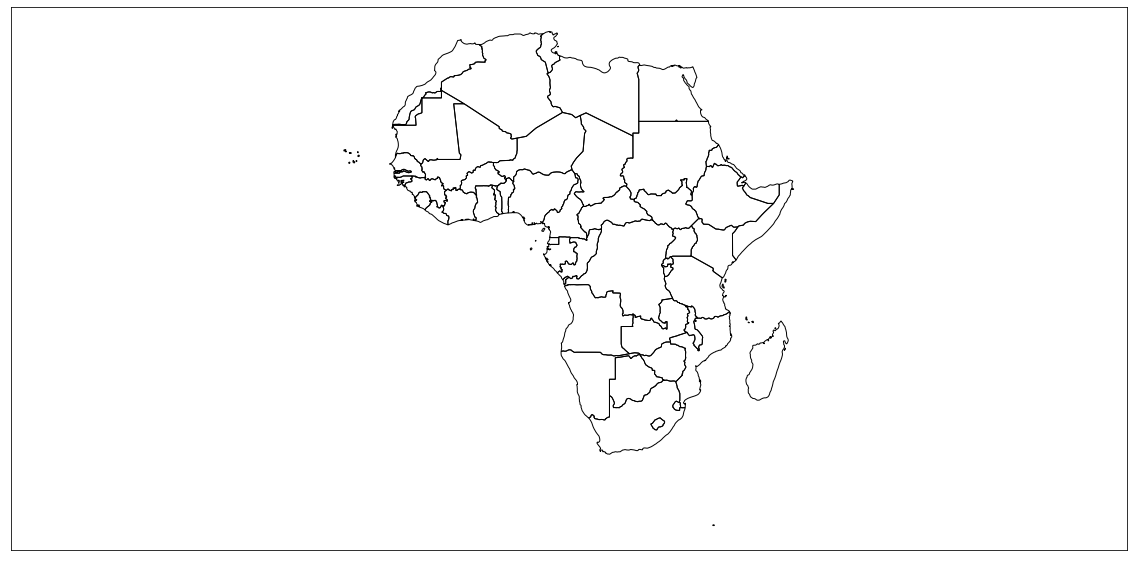

In [29]:
# C.Coulombe - I've added some instructions in order to check the results
vp = VectorPlotter(True,figsize=(20,10))
vp.plot('/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-default.geojson', fill=False)


In [44]:
!cat '/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-default.geojson'

{
"type": "FeatureCollection",
"name": "africa",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ 14.19082031250008, -5.8759765625 ], [ 14.398632812500068, -5.89267578125002 ], [ 14.65791015625004, -5.888867187499955 ], [ 14.749414062500023, -5.88007812500004 ], [ 15.08935546875, -5.874511718749972 ], [ 15.425, -5.868847656249969 ], [ 15.726953125000051, -5.86386718750002 ], [ 16.060156250000063, -5.864941406249969 ], [ 16.315234375000074, -5.865625 ], [ 16.431445312500045, -5.90019531249996 ], [ 16.537109374999972, -5.9658203125 ], [ 16.585156250000011, -6.025292968749952 ], [ 16.608007812500034, -6.051562499999974 ], [ 16.63955078125008, -6.114550781250017 ], [ 16.697265625, -6.164257812500026 ], [ 16.717773437500028, -6.241406250000011 ], [ 16.700976562500045, -6.345996093750003 ], [ 16.709375, -6.471679687499943 ], [ 16.742968749999

{ "type": "Feature", "properties": { }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 32.886132812500023, -26.849316406250011 ], [ 32.776562500000011, -26.850976562500009 ], [ 32.588769531250023, -26.855761718750003 ], [ 32.477734375000011, -26.858496093750006 ], [ 32.353515625, -26.861621093750003 ], [ 32.199609375000023, -26.83349609375 ], [ 32.112890625, -26.839453125 ], [ 32.10595703125, -26.52001953125 ], [ 32.077929687500017, -26.449804687500006 ], [ 32.04833984375, -26.34716796875 ], [ 32.041406250000023, -26.28125 ], [ 32.059960937500023, -26.215039062500011 ], [ 32.06884765625, -26.11015625 ], [ 32.060546875, -26.018359375 ], [ 31.968457031250011, -25.972265625 ], [ 31.9482421875, -25.957617187500006 ], [ 31.928320312500006, -25.885351562500006 ], [ 31.920312500000023, -25.77392578125 ], [ 31.984570312500011, -25.631933593750006 ], [ 31.979394531250023, -25.359472656250006 ], [ 31.987011718750011, -25.263476562500003 ], [ 31.985742187500023, -25.073828125 ], [ 31.98437

In [35]:
#########################  Example 2: 6-digit precision
# Create a json file using the optional COORDINATE_PRECISION creation option
# and set the precision to 6 digits.
json_fn = os.path.join(data_dir, 'output', 'africa-6digit.geojson')
if os.path.exists(json_fn):
    json_driver.DeleteDataSource(json_fn)
json_ds = json_driver.CreateDataSource(json_fn)
if json_ds is None:
    sys.exit('Could not create {0}.'.format(json_fn))

lyr_options = ['COORDINATE_PRECISION=6']
json_lyr = json_ds.CreateLayer('africa',
                               shp_lyr.GetSpatialRef(),
                               ogr.wkbMultiPolygon,
                               lyr_options)

# Write some data.
shp_lyr.ResetReading()
json_feat = ogr.Feature(json_lyr.GetLayerDefn())
for shp_feat in shp_lyr:
    if shp_feat.GetField('CONTINENT') == 'Africa':
        json_feat.SetGeometry(shp_feat.geometry())
        json_lyr.CreateFeature(json_feat)
json_ds

print("Code executed!")

Code executed!


In [25]:
# vp = VectorPlotter(True,figsize=(20,10))
# vp.plot('/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-6digit.geojson', fill=False)
# RuntimeError maybe precision creates a problem when trying to show the graphics...

In [43]:
!cat '/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-6digit.geojson'

{
"type": "FeatureCollection",
"name": "africa",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ 14.19082, -5.875977 ], [ 14.398633, -5.892676 ], [ 14.65791, -5.888867 ], [ 14.749414, -5.880078 ], [ 15.089355, -5.874512 ], [ 15.425, -5.868848 ], [ 15.726953, -5.863867 ], [ 16.060156, -5.864941 ], [ 16.315234, -5.865625 ], [ 16.431445, -5.900195 ], [ 16.537109, -5.96582 ], [ 16.585156, -6.025293 ], [ 16.608008, -6.051562 ], [ 16.639551, -6.114551 ], [ 16.697266, -6.164258 ], [ 16.717773, -6.241406 ], [ 16.700977, -6.345996 ], [ 16.709375, -6.47168 ], [ 16.742969, -6.618457 ], [ 16.813086, -6.772559 ], [ 16.919434, -6.933984 ], [ 16.96582, -7.062109 ], [ 16.952051, -7.157031 ], [ 16.984766, -7.257422 ], [ 17.06377, -7.363086 ], [ 17.121582, -7.419043 ], [ 17.155078, -7.461328 ], [ 17.24502, -7.62334 ], [ 17.411328, -7.881934 ], [ 17.5360

{ "type": "Feature", "properties": { }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ 37.856934, -46.944238 ], [ 37.813965, -46.962891 ], [ 37.611816, -46.946484 ], [ 37.590039, -46.908008 ], [ 37.649707, -46.848926 ], [ 37.684863, -46.824023 ], [ 37.789551, -46.8375 ], [ 37.872852, -46.885449 ], [ 37.887695, -46.90166 ], [ 37.856934, -46.944238 ] ] ], [ [ [ 30.19043, -22.291113 ], [ 30.460156, -22.329004 ], [ 30.711621, -22.297852 ], [ 30.916113, -22.290723 ], [ 31.073438, -22.307812 ], [ 31.197266, -22.344922 ], [ 31.287891, -22.402051 ], [ 31.293164, -22.454687 ], [ 31.300195, -22.478613 ], [ 31.348047, -22.617578 ], [ 31.419336, -22.825098 ], [ 31.466699, -23.016699 ], [ 31.531738, -23.279492 ], [ 31.529687, -23.425781 ], [ 31.545605, -23.482324 ], [ 31.604102, -23.55293 ], [ 31.675586, -23.674219 ], [ 31.7, -23.743066 ], [ 31.724023, -23.794531 ], [ 31.799609, -23.892187 ], [ 31.858301, -24.040234 ], [ 31.908008, -24.23623 ], [ 31.950586, -24.330273 ], [ 31.966602, 

In [37]:
###########################  Example 3: Bounding box
# Create a json file using the optional COORDINATE_PRECISION and WRITE_BBOX
# creation options.
json_fn = os.path.join(data_dir, 'output', 'africa-bbox.geojson')
if os.path.exists(json_fn):
    json_driver.DeleteDataSource(json_fn)
json_ds = json_driver.CreateDataSource(json_fn)
if json_ds is None:
    sys.exit('Could not create {0}.'.format(json_fn))

lyr_options = ['COORDINATE_PRECISION=6', 'WRITE_BBOX=YES']
json_lyr = json_ds.CreateLayer('africa',
                               shp_lyr.GetSpatialRef(),
                               ogr.wkbMultiPolygon,
                               lyr_options)

# Write some data.
shp_lyr.ResetReading()
json_feat = ogr.Feature(json_lyr.GetLayerDefn())
for shp_feat in shp_lyr:
    if shp_feat.GetField('CONTINENT') == 'Africa':
        json_feat.SetGeometry(shp_feat.geometry())
        json_lyr.CreateFeature(json_feat)
del json_ds

print("Code executed!")

Code executed!


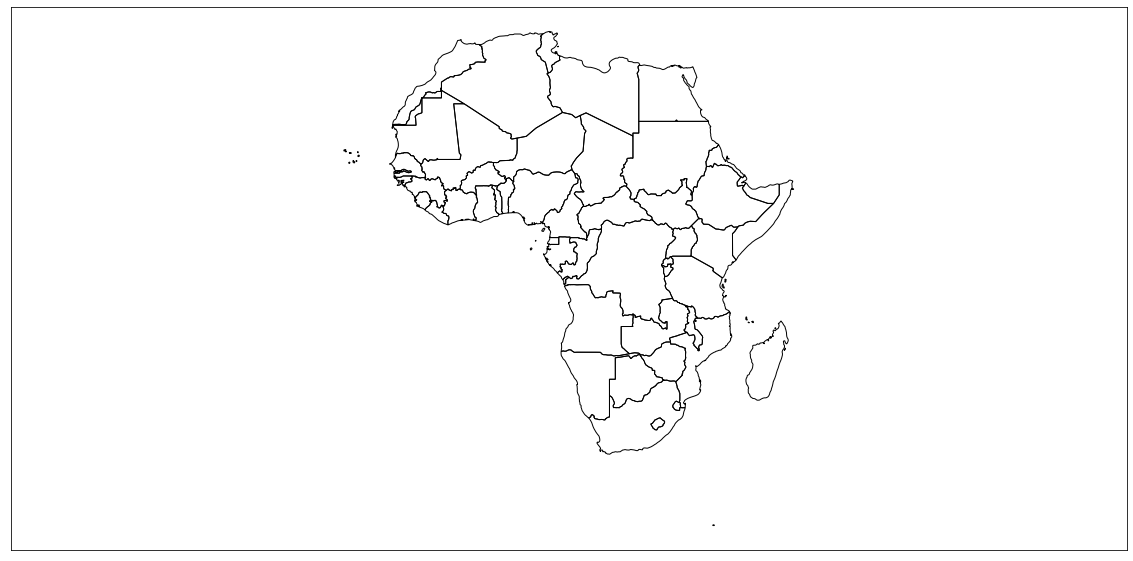

In [38]:
# C.Coulombe - I've added some instructions in order to check the results
vp = VectorPlotter(True,figsize=(20,10))
vp.plot('/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-bbox.geojson', fill=False)


In [39]:
!cat '/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-bbox.geojson'

{
"type": "FeatureCollection",
"name": "africa",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"bbox": [ -25.341552734375, -46.962890625, 51.390234375, 37.340380859375 ],                                                        
"features": [
{ "type": "Feature", "properties": { }, "bbox": [ 11.743066, -18.019727, 24.04668, -4.428906 ], "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ 14.19082, -5.875977 ], [ 14.398633, -5.892676 ], [ 14.65791, -5.888867 ], [ 14.749414, -5.880078 ], [ 15.089355, -5.874512 ], [ 15.425, -5.868848 ], [ 15.726953, -5.863867 ], [ 16.060156, -5.864941 ], [ 16.315234, -5.865625 ], [ 16.431445, -5.900195 ], [ 16.537109, -5.96582 ], [ 16.585156, -6.025293 ], [ 16.608008, -6.051562 ], [ 16.639551, -6.114551 ], [ 16.697266, -6.164258 ], [ 16.717773, -6.241406 ], [ 16.700977, -6.345996 ], [ 16.709375, -6.47168 ], [ 16.742969, -6.618457 ], [ 16.813086, -6.772559 ], [ 16.919434, -6.933984 ], [ 16.96582, -7.062109 ], 

{ "type": "Feature", "properties": { }, "bbox": [ -17.535645, 12.328027, -11.382422, 16.678906 ], "geometry": { "type": "Polygon", "coordinates": [ [ [ -12.280615, 14.809033 ], [ -12.186523, 14.648145 ], [ -12.206836, 14.571143 ], [ -12.228418, 14.458594 ], [ -12.175244, 14.37666 ], [ -12.112891, 14.323291 ], [ -12.068359, 14.274219 ], [ -12.019189, 14.206494 ], [ -12.011182, 14.071826 ], [ -12.020117, 13.974658 ], [ -11.988086, 13.930762 ], [ -11.960889, 13.875293 ], [ -11.966357, 13.828955 ], [ -11.98418, 13.788086 ], [ -12.044141, 13.733887 ], [ -12.054199, 13.633057 ], [ -11.95708, 13.510889 ], [ -11.89458, 13.444434 ], [ -11.895215, 13.406299 ], [ -11.877783, 13.364551 ], [ -11.831689, 13.31582 ], [ -11.803369, 13.327295 ], [ -11.772217, 13.36709 ], [ -11.758252, 13.394531 ], [ -11.674463, 13.382373 ], [ -11.634961, 13.369873 ], [ -11.581348, 13.290039 ], [ -11.56167, 13.236963 ], [ -11.548779, 13.170264 ], [ -11.492822, 13.086963 ], [ -11.444141, 13.028223 ], [ -11.433936, 12.991

In [40]:
#################  Bonus examples for creating new features  ##################

shp_fn = os.path.join(data_dir, 'global', 'ne_50m_admin_0_countries.shp')
json_fn = os.path.join(data_dir, 'output', 'africa-new.geojson')

# Open input.
shp_ds = ogr.Open(shp_fn, 0)
if shp_ds is None:
    sys.exit('Could not open {0}'.format(shp_fn))
shp_lyr = shp_ds.GetLayer(0)

# Create output file.
json_driver = ogr.GetDriverByName('GeoJSON')
if os.path.exists(json_fn):
    json_driver.DeleteDataSource(json_fn)
json_ds = json_driver.CreateDataSource(json_fn)
if json_ds is None:
    sys.exit('Could not create {0}.'.format(json_fn))
lyr_options = ['COORDINATE_PRECISION=6']
json_lyr = json_ds.CreateLayer('africa',
                               shp_lyr.GetSpatialRef(),
                               ogr.wkbMultiPolygon,
                               lyr_options)

# Add attribute fields to the layer.
name_fld = ogr.FieldDefn('Name', ogr.OFTString)
json_lyr.CreateField(name_fld)
pop_fld = ogr.FieldDefn('Population', ogr.OFTInteger)
json_lyr.CreateField(pop_fld)

# For the fun of it, let's also add an integer field but "mistakenly" put a
# string in it to see what happens.
test_fld = ogr.FieldDefn('Test_field', ogr.OFTInteger)
json_lyr.CreateField(test_fld)

# Get the feature definition.
feat_defn = json_lyr.GetLayerDefn()

# Create an output feature to use repeatedly.
json_feat = ogr.Feature(feat_defn)

for shp_feat in shp_lyr:
    if shp_feat.GetField('CONTINENT') == 'Africa':

        # Copy attribute values if in Africa.
        name = shp_feat.GetField('NAME')
        pop = shp_feat.GetField('POP_EST')
        json_feat.SetField('Name', name)
        json_feat.SetField('Population', pop)

        # Put a string in an integer field.
        json_feat.SetField('Test_field', name)

        # Copy the geometry.
        json_feat.SetGeometry(shp_feat.geometry())

        # Insert the data into the GeoJSON file.
        json_lyr.CreateFeature(json_feat)

del json_ds, shp_ds

print("Code executed!")

Code executed!


In [42]:
!cat '/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-new.geojson'

{
"type": "FeatureCollection",
"name": "africa",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { "Name": "Angola", "Population": 12799293, "Test_field": 0 }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ 14.19082, -5.875977 ], [ 14.398633, -5.892676 ], [ 14.65791, -5.888867 ], [ 14.749414, -5.880078 ], [ 15.089355, -5.874512 ], [ 15.425, -5.868848 ], [ 15.726953, -5.863867 ], [ 16.060156, -5.864941 ], [ 16.315234, -5.865625 ], [ 16.431445, -5.900195 ], [ 16.537109, -5.96582 ], [ 16.585156, -6.025293 ], [ 16.608008, -6.051562 ], [ 16.639551, -6.114551 ], [ 16.697266, -6.164258 ], [ 16.717773, -6.241406 ], [ 16.700977, -6.345996 ], [ 16.709375, -6.47168 ], [ 16.742969, -6.618457 ], [ 16.813086, -6.772559 ], [ 16.919434, -6.933984 ], [ 16.96582, -7.062109 ], [ 16.952051, -7.157031 ], [ 16.984766, -7.257422 ], [ 17.06377, -7.363086 ], [ 17.121582, -7.419043 ], [ 17.155078, -7.461328 ], [

{ "type": "Feature", "properties": { "Name": "Sierra Leone", "Population": 6440053, "Test_field": 0 }, "geometry": { "type": "MultiPolygon", "coordinates": [ [ [ [ -12.526074, 7.436328 ], [ -12.540625, 7.410254 ], [ -12.607178, 7.474512 ], [ -12.951611, 7.57085 ], [ -12.854395, 7.622021 ], [ -12.615234, 7.637207 ], [ -12.544189, 7.607373 ], [ -12.5125, 7.582422 ], [ -12.500635, 7.535107 ], [ -12.526074, 7.436328 ] ] ], [ [ [ -11.180859, 9.925342 ], [ -11.115674, 9.843164 ], [ -11.047461, 9.786328 ], [ -10.963086, 9.661621 ], [ -10.864795, 9.516455 ], [ -10.758594, 9.385352 ], [ -10.690527, 9.314258 ], [ -10.682715, 9.289355 ], [ -10.687646, 9.261133 ], [ -10.72124, 9.194482 ], [ -10.749951, 9.122363 ], [ -10.747021, 9.095264 ], [ -10.726855, 9.081689 ], [ -10.615967, 9.05918 ], [ -10.605762, 8.978809 ], [ -10.605615, 8.867578 ], [ -10.551758, 8.76377 ], [ -10.500537, 8.687549 ], [ -10.503125, 8.660303 ], [ -10.628467, 8.52998 ], [ -10.677344, 8.400586 ], [ -10.702148, 8.364209 ], [ -10

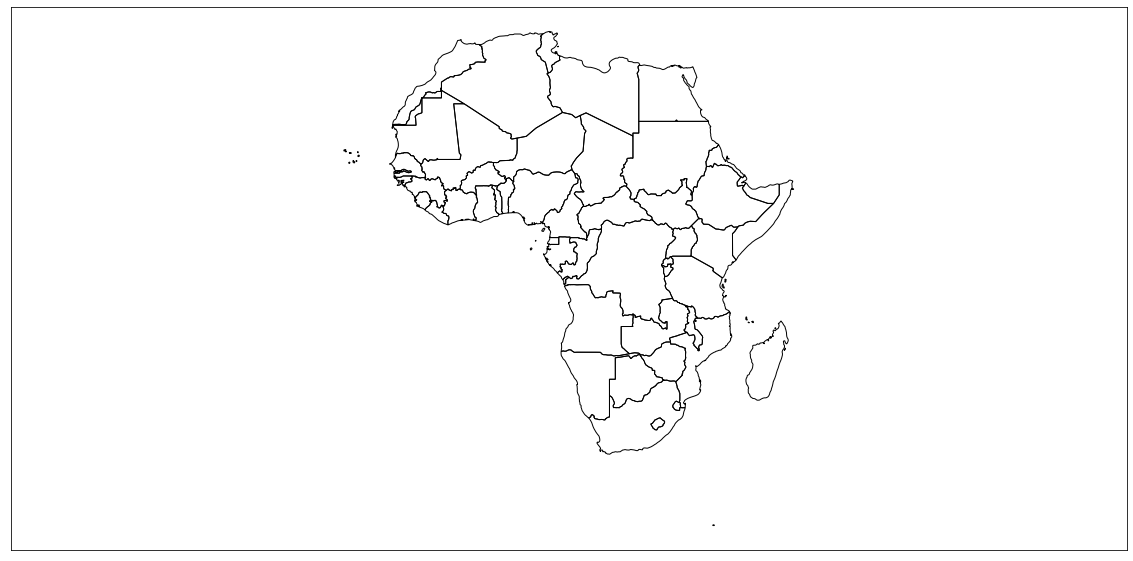

In [31]:
# C.Coulombe - I've added some instructions in order to check the results
vp = VectorPlotter(True,figsize=(20,10))
vp.plot('/home/user/Documents/osgeopy-data/osgeopy-data/output/africa-new.geojson', fill=False)
